In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
#preproc_folder = "enriched_time"
#datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
#output_path = "../data/models/"

#prefix = 'time_2018-02-20_p180_bg_'
#postfix = '_190721_170'
#trainfile = '_traindata'
#testfile = '_testdata'

In [3]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-02-20_p180_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_713'
postfix_time_seq = '_190812_1645'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = preproc_folder+valid_code.split('_val_')[1][:-1]+"_p180"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__traindata_190815_713.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__testdata_190815_713.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__traindata_190812_1645.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__testdata_190812_1645.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                2520      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                3195   

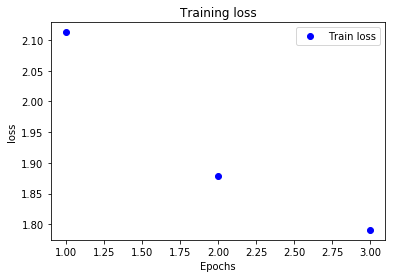

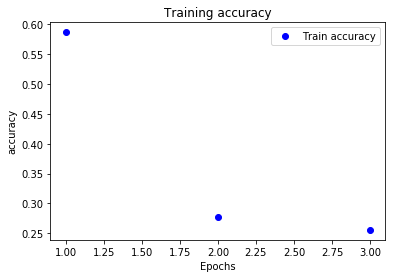

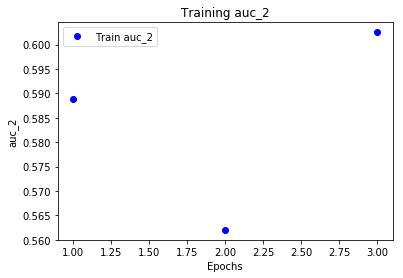

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_8 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_9 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 15)               

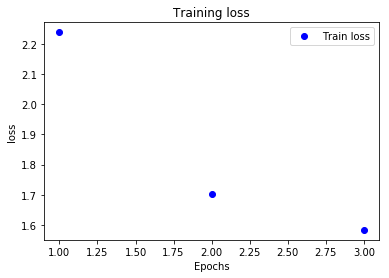

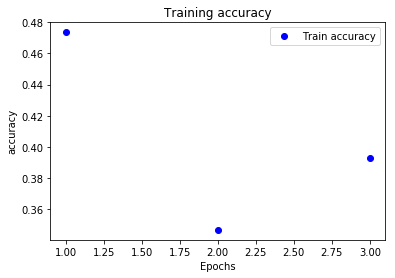

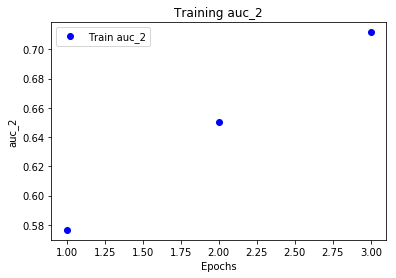

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_13 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_14 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 15)               

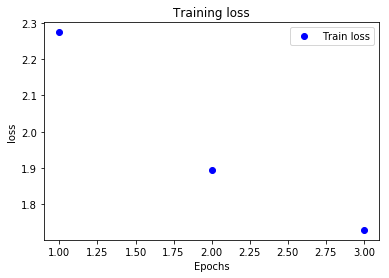

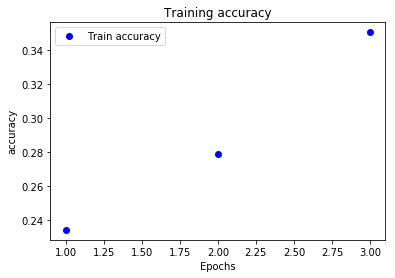

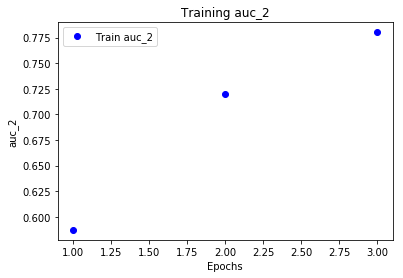

Validation AUC aggregating the results of 3 folds: 0.7170266919149753

Retraining the model using the full training set for proper testing...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_17 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_18 (Dropout)         (None, 30)     

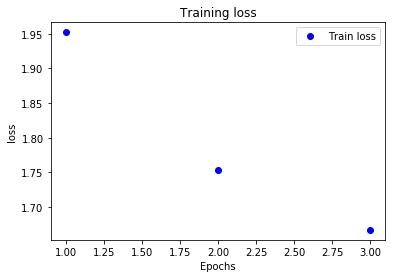

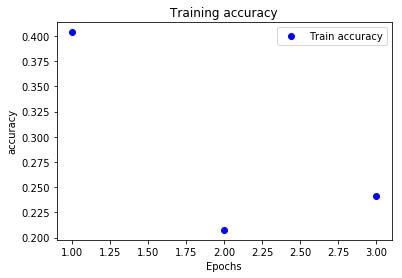

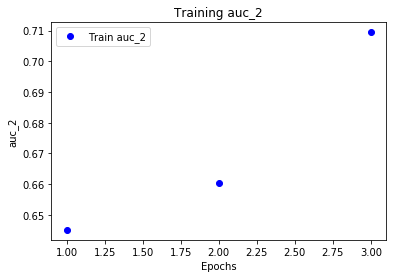

- Saving the model to ../data/models/test_mlp/...
Saving model to ../data/models/test_mlp/time_2018-02-20_p180_bg__sequential_190817_1745.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.39003 0.60997]
 [0.00026 0.00323]]
AUC 0.750
Confusion matrix:
[[6040 9446]
 [   4   50]]
- Activating existing experiment 'test_mlp', the following results will be saved in it...
- Tracking the experiment on mlflow...


Using TensorFlow backend.


- Experiment tracked.


In [4]:
experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
            postfix_time_seq_val, valid_code, indexfile,
                     experiment_name='test_mlp', 
                     hidden_layers_no=4, 
                     hidden_nodes=[70, 45,30,15],
                     optimizer=Adam(0.001),
                     hl_activations=[tf.nn.relu]*4, dropout=[0.5]*4, 
                     loss_func = tf.keras.losses.BinaryCrossentropy(),
                     metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                     to_monitor=('accuracy', 0.9),
                     validation_ep=True,
                     epochs=3, 
                     batch_size=128,
                     use_batch_and_steps=False,
                     class_1_weight=25,
                     pred_threshold = 0.55,
                     verbose=0,
                     early_stopping=True, 
                     save_model=True, 
                     save_results_for_viz=False,
                     mlf_tracking=True)

In [5]:
dictviz = pd.read_pickle('../data/viz_data/test_mlp/time_2018-02-20_p180_bg__sequential_190817_171_viz.pkl')

In [7]:
dictviz

{'experiment': 'test_mlp',
 'prefix': 'time_2018-02-20_p180_bg_',
 'postfix': '_190812_1645',
 'validation_code': '_val_24000_6000_',
 'validation': {'fold_1': {'loss': [2.115432766756795,
    1.8926696872200264,
    1.8091406546991982],
   'accuracy': [0.5837452, 0.28240377, 0.2400432],
   'auc_4': [0.58543247, 0.55063105, 0.5952644],
   'precision_5': [0.09749359, 0.086356804, 0.08745858],
   'recall_5': [0.5297587, 0.86273456, 0.93404824],
   'results': {'fpr': array([0.00000000e+00, 1.67954316e-04, 1.67954316e-04, 1.67954316e-03,
           1.67954316e-03, 3.02317770e-03, 3.02317770e-03, 4.36681223e-03,
           4.36681223e-03, 4.70272086e-03, 4.70272086e-03, 7.05408129e-03,
           7.05408129e-03, 1.76352032e-02, 1.76352032e-02, 1.88108834e-02,
           1.88108834e-02, 2.58649647e-02, 2.58649647e-02, 3.56063151e-02,
           3.56063151e-02, 3.69499496e-02, 3.69499496e-02, 3.77897212e-02,
           3.77897212e-02, 3.96372187e-02, 3.96372187e-02, 4.23244877e-02,
          